In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

In [2]:
#Starting Parameters
threshold = 500

In [3]:
#Helper Functions
def _printHelper(heading, msg):
    print("=============================================")
    print(heading + "\n")
    print(msg)
    print("=============================================")
    
def printError(error):
    _printHelper("ERROR", error)
    
def printHeading(heading):
    print()
    print("=============================================")
    print(heading)
    print("=============================================")
    print()

In [4]:
#Making CSV into pandas.dataframe object
df = pd.read_csv("phishing_data.csv")

In [5]:
#Printing out the different columns
printHeading("Column Names")
print(df.columns)

printHeading("Number of Columns")
print(len(df.columns))


Column Names

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statis

In [6]:
#Printing out first 100 rows of data
df.head(100)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,3,2,3,2,12,12,5,5.000000,7.500000,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.000000,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,6,2,2,0,35,35,0,10.700000,10.700000,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,5,3,3,3,17,17,9,7.400000,10.000000,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,3,3,3,0,5,5,0,4.000000,4.000000,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.000000,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,11,11,0,7.000000,7.000000,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.000000,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate
5,https://support-appleld.com.secureupdate.duila...,128,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.117188,0.000000,0,0,0,1,0,3,1,0,0,0,0,0,13,4,2,3,2,17,13,17,7.769231,8.400000,7.375000,0,0,0,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,100.000000,0,0,0,1,one,0,25,3993,5707171,0,1,0,phishing
6,https://www.authpro.com/auth/ubabankng/?action...,50,15,0,2,0,0,1,0,0,1,0,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,6,3,3,3,3,9,7,9,5.333333,5.000000,5.500000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,705,7330,154708,0,0,4,phishing
7,http://littlee.com.au/alibaba/login.alibaba.co...,51,14,0,5,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,6,2,3,7,3,7,7,7,5.333333,7.000000,5.000000,3,0,0,1,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,zero,1,0,-1,0,0,1,0,phishing
8,http://www.tutorialspoint.com/dbms/,35,22,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.

### Object to Int64 or Float64 data types

Converting all Strings to Integers in some form in order to work with it easier and normalize 

### Y- Column to 1s and 0s

Setting the status column with `phishing` being `1` and `legitimate` being `0`

In [7]:
#Status Column to Integers
def cleanStatus(df):
    for i,e in enumerate(df["status"]):
        if (e == "phishing"):
            df['status'][i] = 1
        elif (e == "legitimate"):
            df['status'][i] = 0

    df['status'] = pd.to_numeric(df['status'])
    
cleanStatus(df)  

### Cleaning up all Features that Count the Number of Feature

Making sure all the elements inside this column are **integers** (int64)  or **float** (float64)

In [8]:
def cleanUpOneZero(df,colLst, columnName,item_threshold):
    
    if (df[columnName].isnull().values.any()):
        printError("There are some null values")
        
    for index,element in enumerate(df[columnName]):
        if (type(element) != int):
            try:
                int(element)
            except:
                if (element == "zero" or element =="Zero"):
                    df[columnName].iat[index] = 0
                elif (element == "one" or element == "One"):
                    df[columnName].iat[index] = 1                    
                else:
                    print()
                    print("For Column:")
                    print("============\n")
                    printError('Never account for the number "' + str(element) + '"')
                    print()
                    break
                
    try:
        df[columnName] = pd.to_numeric(df[columnName])
    except:
        print()
        print("For Column:")
        print("============\n")
        printError("Failed to convert column (" + columnName + ") to integers")
        print()
        return False
        
        
    if (len(df[columnName].value_counts()) != 2 and  len(df[columnName].value_counts()) != 1):
        if (len(df[df[columnName] > 0]) < item_threshold):
            del df[columnName]
            print()
            print("Deleting " + columnName + " as there is only n amount of numbers for the feature, where n < threshold")
            print()
            colLst.remove(columnName)
            return True
        
        return False
        
    if (len(df[df[columnName] > 0]) < item_threshold or len(df[df[columnName]== 0]) < item_threshold):
        del df[columnName]
        print()
        print("Deleting " + columnName + " as there is only n amount of numbers for the feature, where n < threshold")
        print()
        colLst.remove(columnName)
        return True


In [9]:
#List of Features that we going to clean in our dataset
colLst = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank']


idx = 0

while (idx < len(colLst) - 1):
    feature = colLst[idx]
    
    if (cleanUpOneZero(df,colLst,feature,threshold)):
        idx -= 1
    
    idx += 1



Deleting nb_at as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_or as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_tilde as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_percent as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_star as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_comma as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_semicolumn as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_dollar as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_space as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_dslash as there is only n amount of numbers for the feature, where n < threshold


Deleting http_in_path as there is only n amount of number

## Normalization

Normalizing the data before getting the covariance  

### Formula:
(element - mean)/(standard deviation)

In [10]:
#Storing and Deleting status (phishing or not) from dataset
statusColumn = df['status']
del df['status']
urlColumn = df['url']
del df['url']

#Normalizing remainding features
df = (df-df.mean())/(df.std())

#Add Columns back (So they don't get normalized)
df['status'] = statusColumn
df['url'] = urlColumn

### Getting the Covariance between each Feature and Status (Phishing or Legitimate)

So we can see if we can delete the features that we don't understand if it doesn't have a big impact on the predictions.


In [11]:
def getCovarianceVector(df):
    #Getting Covariance Matrix
    covDf = pd.DataFrame.cov(df)

    #Getting only the covarince of all the features and the status column
    del covDf['status']['status']
    covDf = covDf['status']
    
    # index = covDf.index
    # x = covDf.rows
    # print(x)
    
    return covDf


covDf = getCovarianceVector(df)

#Printing out Covariance 

covDf.head(100)


length_url                    0.122758
length_hostname               0.124186
ip                            0.159140
nb_dots                       0.100476
nb_hyphens                   -0.048708
nb_qm                         0.146679
nb_and                        0.086875
nb_eq                         0.117088
nb_underscore                 0.020014
nb_slash                      0.119932
nb_colon                      0.047183
nb_www                       -0.221905
nb_com                        0.079576
https_token                   0.055458
ratio_digits_url              0.178212
ratio_digits_host             0.112384
tld_in_path                   0.046814
tld_in_subdomain              0.104759
nb_subdomains                 0.054965
prefix_suffix                 0.100879
random_domain                 0.007922
shortening_service            0.047693
nb_redirection               -0.011302
length_words_raw              0.096434
char_repeat                   0.008630
shortest_words_raw       

### Plot

Plot of covariances with each feature to `status` to see if `phishing` is 1 or 0

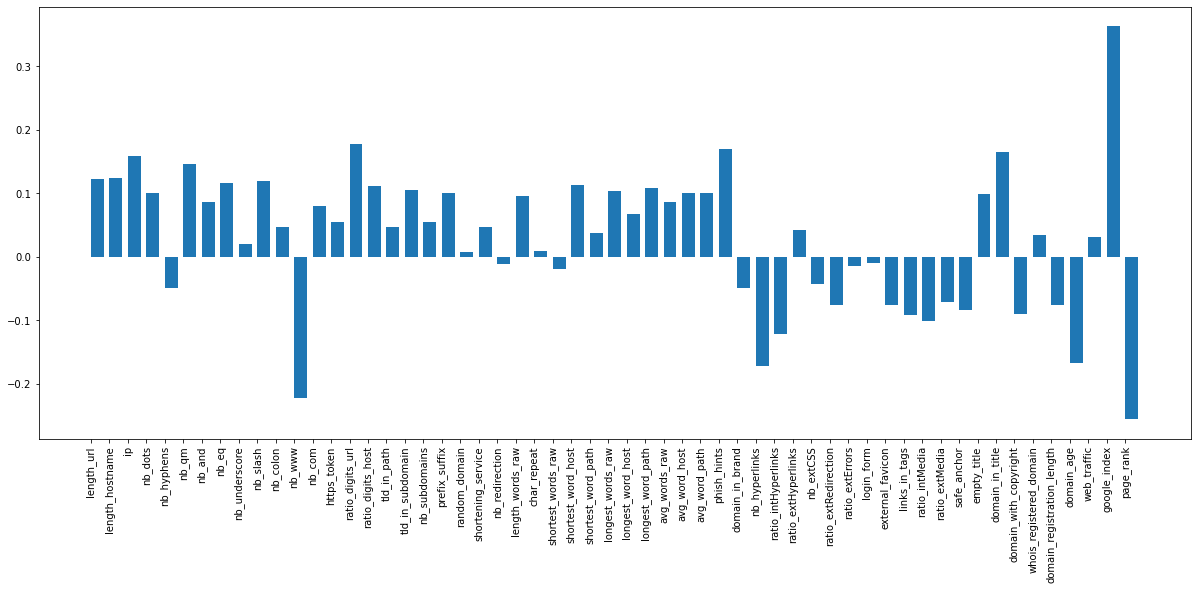

In [12]:
fig = plt.figure(figsize=(16, 6)) # the figsize changes the width and height respectively
ax = fig.add_axes([0,0,1,1])
langs = covDf.index
students = covDf
ax.bar(langs,students, align='edge', width=0.7) #width determines width of bars
plt.xticks(rotation = 90) 
plt.show()

### Deletes

Deleting the `whois_registered_domain` as we do not know what it represetns AND that the correlation between it and the `answer/status/'phishing or legitimate' column` is low

In [13]:
#Deleting Columns
if 'whois_registered_domain' in df:
    del df['whois_registered_domain']

### Functions to Get Dataset

We doing this so we can call these functions in our ML Algorithms (abstraction to clean up code)

In [14]:
def getDataset(item_thresholdNew):
    
    def cleanStatus(df):
        for i,e in enumerate(df["status"]):
            if (e == "phishing"):
                df['status'][i] = 1
            elif (e == "legitimate"):
                df['status'][i] = 0

        df['status'] = pd.to_numeric(df['status'])
    
    def cleanUpOneZero(df,colLst, columnName,item_threshold):

        if (df[columnName].isnull().values.any()):
            printError("There are some null values")

        for index,element in enumerate(df[columnName]):
            if (type(element) != int):
                try:
                    int(element)
                except:
                    if (element == "zero" or element =="Zero"):
                        df[columnName].iat[index] = 0
                    elif (element == "one" or element == "One"):
                        df[columnName].iat[index] = 1                    
                    else:
                        print()
                        print("For Column:")
                        print("============\n")
                        printError('Never account for the number "' + str(element) + '"')
                        print()
                        break

        try:
            df[columnName] = pd.to_numeric(df[columnName])
        except:
            print()
            print("For Column:")
            print("============\n")
            printError("Failed to convert column (" + columnName + ") to integers")
            print()
            return False


        if (len(df[columnName].value_counts()) != 2 and  len(df[columnName].value_counts()) != 1):
            if (len(df[df[columnName] > 0]) < item_threshold):
                del df[columnName]
                print()
                print("Deleting " + columnName + " as there is only n amount of numbers for the feature, where n < threshold")
                print()
                colLst.remove(columnName)
                return True

            return False

        if (len(df[df[columnName] > 0]) < item_threshold or len(df[df[columnName]== 0]) < item_threshold):
            del df[columnName]
            print()
            print("Deleting " + columnName + " as there is only n amount of numbers for the feature, where n < threshold")
            print()
            colLst.remove(columnName)
            return True

    
    #Making CSV into pandas.dataframe object
    df = pd.read_csv("phishing_data.csv")
    
    #Status Column to Integers
    cleanStatus(df)
    
    colLst = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank']


    #Cleaning up all records
    idx = 0

    while (idx < len(colLst) - 1):
        feature = colLst[idx]

        if (cleanUpOneZero(df,colLst,feature,item_thresholdNew)):
            idx -= 1

        idx += 1
        
    #Normalize Data
    statusColumn = df['status']
    del df['status']
    urlColumn = df['url']
    del df['url']

    df = (df-df.mean())/(df.std())

    df['status'] = statusColumn
    df['url'] = urlColumn
    
    #Deleting Columns
    if 'whois_registered_domain' in df:
        del df['whois_registered_domain']

    return df